In [2]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow_probability.substrates import numpy as tfp
tfd = tfp.distributions

np.random.seed(0)

# Mixture Modelling

## aka modelling heterogeneity

$\newcommand{\iid}{\stackrel{\mbox{iid}}{\sim}}$


In mixture model, we account for heterogeneity in the data by assuming that there is not "one single" data generating process, but actually K of them.

Therefore, we expect to find K different subpopulations (== clusters) in our data, and that each subpopulation is homogeneous: it is suitably modeled by a density, typically from a parametric family.

In its most general form, let $f_1(\cdot), \ldots, f_K(\cdot)$ be $K$ probability density functions over a space $\mathbb{Y}, \mathcal{Y}$, $\mathbf{w} = (w_1, \ldots, w_K)$ a vector in the $K$-simplex; a mixture model assumes the following likelihood

\begin{equation}
    y_1, \ldots, y_n \mid \mathbf{w}, \{f_j\}_{j=1}^K \iid f^*(y) := \sum_{j=1}^K w_j f_j(y)
    \tag{1}
\end{equation}

We refer to the $f_j$'s as the _components_ of the mixture

$\newcommand{\ind}{\stackrel{\small \mbox{ind}}{\sim}}$

The connection to clustering is made more explicit by introducing "cluster assignment" variables $c_i$, $i=1, \ldots, n$ such that
$$
    P(c_i = h \mid \mathbf{w}) = w_h
$$

Then, the mixture likelihood can be restated as the following hierarchical model

\begin{equation}
    \begin{aligned}
        y_i \mid c_i = h, \{f_j\}_{j=1}^K & \ind f_h \\
        P(c_i = h \mid \mathbf{w}) = w_h
    \end{aligned}
    \tag{2}
\end{equation}

Usually, $\{f_j\}_{j=1}^K$ belong to the same parametric family (e.g., the normal distribution), and differ only for the specific values of the parameters (e.g., every component has a different mean/variance). But this might not always be the case.

# Exercise 1: Gaussian Mixture Model

Consider the dataset in the file "gestational_age_data.csv", that contains the gestational age of more than two thousand children (in days).

We can model the data using a mixture of three gaussian distributions.

\begin{equation*}
    y_1, \ldots, y_n \mid \mathbf{w}, \mathbf{\mu}, \mathbf{\sigma}^2 \iid \sum_{h=1}^3 w_h \mathcal{N}(\mu_h, \sigma^2_h) 
\end{equation*}


1.1) Describe a simple prior for $\mathbf{w}$

1.2) Using the likelihood in (2), derive the full conditional for $\mathbf{w}$

1.3) What is a simple semi-conjugate prior for $(\mu_h, \sigma_h^2)$. Derive the full conditional for these parameters

1.4) Describe a Gibbs sampler that alternates between updating the $c_i$'s, the weights $\mathbf w$ and the "unique values" $(\mu_1, \sigma_1^2), \ldots (\mu_K, \sigma_K^2)$ where in this example $K=3$.


1.5) Complete the model by specifying a prior such that the expected value of each $\mu_h$ is equal to the empirical/sample mean and the expected value of each $\sigma^2_h$ is equal to one half of the sample variance. Choose the remaining parameters "wisely".

## Answer

1.1)
\begin{equation}
\begin{aligned}
    \mathbf{w} &\sim \text{Dirichlet}(\alpha_1,\alpha_2 , \alpha_{3}) \\
\end{aligned}
\end{equation}

1.2)

$$
    \mathcal{L}(\mathbf{w} \mid \mathbf{\mu}, \mathbf{c}, \mathbf{\sigma}^2, \mathbf{y}) \propto \prod_{h=1}^{3} \mathcal{w_h}^\mathcal{\alpha_h - 1 + \mathcal{n_h}}\\
\mathcal{n_h} =\sum_{i=1}^{n}\mathbb{1}{\{\mathcal{c_i = h}\}}\\
\mathbf{w} \mid \mathbf{\mu}, \mathbf{c}, \mathbf{\sigma}^2, \mathbf{y} \iid \text{Dirichlet}(\alpha_1 + n_1,\alpha_2 + n_2, \alpha_{3}+ n_3) 
$$

1.3)
\begin{equation*}
    (\mu_K, \sigma_K^2) \iid \mathcal{N-InvGamma}(\mu_0, \lambda, \alpha, \beta) 
\end{equation*}
\begin{equation*}
     \mu_h \mid \mathbf{c}, \mathbf{y}, \mathbf{\sigma}^2 \iid \mathcal{N}((\frac{\sum_{i=1 : c_i=h} y_i +\lambda*\mu_0}{(n_h + lambda)} , \sigma^2_h) 
\end{equation*}
\begin{equation*}
     \mathbf{\sigma_h}^2 \mid \mathbf{c}, \mathbf{y}, \mathbf{\mu} \iid \mathcal{InvGamma}( \alpha + \frac{n_h+1}{2} , 0.5 * (\sum_{i=1 : c_i=h} (y_i-\mu_h)^2 + 2*\beta + \lambda*(\mu_h-\mu_0)^2) 
\end{equation*}

1.4)
For every parameter, set an initial value. Then, we iteratively sample from each full conditional, as the following: 

For every h compute: 



$$
\mathcal{n_h} =\sum_{i=1}^{n}\mathbb{1}{\{\mathcal{c_i = h}\}}\\
$$

Sample the new weights as

$$
\mathbf{w} \mid \mathbf{\mu}, \mathbf{c}, \mathbf{\sigma}^2, \mathbf{y} \iid \text{Dirichlet}(\alpha_1 + n_1,\alpha_2 + n_2, \alpha_{3}+ n_3) 
$$

Sample the new means

$$
\begin{equation*}
\mu_h \mid \mathbf{c}, \mathbf{y}, \mathbf{\sigma}^2 \iid \mathcal{N}((\frac{\sum_{i=1 : c_i=h} y_i +\lambda*\mu_0}{(n_h + lambda)} , \sigma^2_h) 
\end{equation*}
$$

Sample the new variances
$$
\begin{equation*}
     \mathbf{\sigma_h}^2 \mid \mathbf{c}, \mathbf{y}, \mathbf{\mu} \iid \mathcal{InvGamma}( \alpha + \frac{n_h+1}{2} , 0.5 * (\sum_{i=1 : c_i=h} (y_i-\mu_h)^2 + 2*\beta + \lambda*(\mu_h-\mu_0)^2) 
\end{equation*}
$$


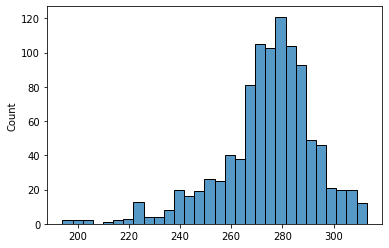

In [6]:
data = np.loadtxt("gestational_age_data.csv")
np.random.shuffle(data)
data = data[:1000]
sns.histplot(data)
plt.show()

In [26]:
m=np.mean(data)
v=np.var(data)/2

In [7]:
def run_one_gibbs(data, cluster_allocs, uniq_vals, weights):
    """
    Runs one iteration of the gibbs sampler
    Parameters
    ----------
    data: a numpy array of floats, contains the observations
    cluster_allocs: a numpy array of integers, contains the c_i's(same length of data)
    uniq_vals: a numpy array of size [K, 2], contains (mean, variance) for every component
    weights: a numpy array of size [K], contains the weights of the components
    """
    
    n_clus = len(weights)
    
    for h in range(n_clus):
        clusdata = data[cluster_allocs == h]
        if len(clusdata) == 0:
            uniq_vals[h, :] = sample_uniq_vals_prior()
        else:
            uniq_vals[h, :] = sample_uniq_vals_fullcond(clusdata)
    
    cluster_allocs = update_cluster_allocs(data, weights, uniq_vals)
    
    weights = update_weights(cluster_allocs, n_clus)
    
    return cluster_allocs, uniq_vals, weights



def run_mcmc(data, niter=7500, nburn=2500, thin=5):
    cluster_allocs = tfd.Categorical(probs=np.ones(3) / 3).sample(len(data))
    weights = np.ones(3) / 3
    
    # TODO Complete by sampling from an appropriate distribution
    uniq_vals = np.dstack([
        tfd.Normal(np.mean(np.array(data)), 20).sample(3),
        tfd.InverseGamma(pow(np.var(data),2)/20 +2, pow(np.var(data),3)/40+np.var(data)/2).sample(3)])[0, :, :]
    
    allocs_out = []
    uniq_vals_out = []
    weights_out = []
    
    for i in range(niter):
        cluster_allocs, uniq_vals, weights = run_one_gibbs(
            data, cluster_allocs, uniq_vals, weights)
        
        if i > nburn and i % thin == 0:
            allocs_out.append(cluster_allocs)
            uniq_vals_out.append(uniq_vals)
            weights_out.append(weights)
            
        if i % 10 == 0:
            print("\rIter {0} / {1}".format(i+1, niter), flush=True, end=" ")
            
    return allocs_out, uniq_vals_out, weights_out

In [36]:
from tensorflow_probability.substrates import numpy as tfp
tfd = tfp.distributions


def update_cluster_allocs(data, weights, uniq_vals):
    # Hint: the update of each c_i can be done independently of
    # the other c_j's (j != i) ---> Use numpy broadcasting /vectorizaiton
    # to speed up the code
    # Hint: you might need to evaluate the likelihood of each observation
    # with parameters in each cluster. The following snippet returns a
    # [n, K] matrix with [i, j]-entry equal to log_prob(y_i | \mu_j, \sigma^2_j)
    
    logprobs = tfd.Normal(
        uniq_vals[:, 0], np.sqrt(uniq_vals[:, 1])).log_prob(data[:, np.newaxis])
    
    # TODO: probs should be a [n, 3] matrix with [i, j]-entry equal to
    # P(c_i = j | all the rest)
    logprobs += np.log(weights)
    probs =  np.exp(logprobs)/np.sum(np.exp(logprobs))
    return tfd.Categorical(probs=probs).sample()


def update_weights(cluster_allocs, n_clus):
    # Hint: you might need to count how many observations are in each cluster
    # you can use the following code
    n_by_clus = np.array([np.sum(cluster_allocs == h) for h in range(n_clus)])

    
    post_params = np.ones(3) / 3 + n_by_clus
    return tfd.Dirichlet(post_params.astype(float)).sample()


def sample_uniq_vals_prior():
    # TODO: choose appropriate variables and parameters
    
    alpha_0=pow(v,2)/20 +2
    beta_0=pow(v,3)/40+v/2
    var = tfd.InvGamma(alpha_0,beta_0).sample()
    mu = tfd.Normal(np.mean(data), 20).sample()
    return np.array([mu, var])
    

def sample_uniq_vals_fullcond(clusdata):
    # TODO: compute the full conditional parameters
    
    alpha_0=pow(v,2)/20 +2
    beta_0=pow(v,3)/40+v/2
    var = tfd.InverseGamma(alpha_0 + 0.5*(len(clusdata)+1), 0.5*(np.sum((clusdata-np.ones(len(clusdata))*np.mean(clusdata))**2) + 2*beta_0 + (np.mean(clusdata)-np.mean(data))**2)).sample()
    mu = tfd.Normal((np.sum(clusdata)+np.mean(data))/(len(clusdata)+1), var/(len(clusdata)+1)).sample()
    return np.array([mu, var])

In [37]:
allocs_out, uniq_vals_out, weights_out = run_mcmc(data)

Iter 7491 / 7500 

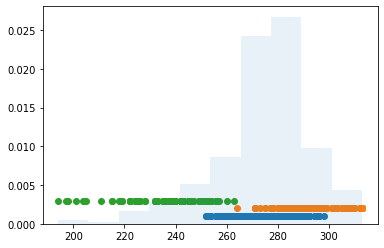

In [38]:
plt.hist(data, density=True, alpha=0.1)
for h in range(3):
    currd = data[allocs_out[-1] == h]
    plt.scatter(currd, np.zeros_like(currd) + 0.001 * (h+1))

# Exercise 2: Posterior inference in Mixture Models

Mixture models are subject to the so called "label switching", which causes non-identifiability for all the parameters.

Label switching means that permuting the "labels" {1, 2, ..., K} of the cluster yields the same exact likelihood.
Hence, it does not make sense to talk about "first", "second" and "third" cluster.
Moreover, also interpretation of the cluster parameters is tricky: we cannot say that

$$
    \frac{1}{M} \sum_{j=1}^M \mu^{(j)}_1
$$

is an estimate of parameter $\mu_1$. Also, it does not make sense to take averages of the cluster allocation labels.

There are several ways to solve this non-identifiability issue, we will focus here on a decision-theoretic approach.


2.1) Implement a function that finds the clustering, among the ones visited in the MCMC chain, that minimizes Binder's loss function:

$$
    \sum_{i=1}^n \sum_{j=1}^n (\mathbb I [c_i = c_j] - p_{ij})^2
$$
where $p_{ij}$ is the posterior probability that observations $i$ and $j$ belong to the same cluster.

Note that $p_{ij}$ can be easily estimated from the MCMC chains!

2.2) Given the estimated clustering $\mathbf{c}^*$, estimate the parameters in each cluster. Let $c^*_h$ denote the index-set of the $h$--th cluster (e.g., $c^*_1 = \{1, 3, 10\}$, $c^*_2 = \{0, 2, 4, 5, 6\}$ ...)
Then
$$
    \hat \mu_h = \frac{1}{M} \sum_{j=1}^M \frac{1}{\# c^*_h} \sum_{i \in c^*_h} \mu^{(j)}_{c_i}
$$
where $\mu^{(j)}_\ell$  is the mean parameter in the $\ell$--th cluster at the $j$--th MCMC iteration.

Similarly for the variance $\hat \sigma_h^2$.

2.3) Comment on the posterior inference obtained

In [39]:
def get_psm(clus_alloc_chain):
    """
    Returns the posterior similarity matrix, i.e.
        out[i, j] = P(c_i == c_j | all the rest)
    for each pair of observations
    """
    #Fare confronto tra colonna i e j della matrice e poi calcolare da li
    c_chain = np.vstack(clus_alloc_chain)
    out = np.zeros((c_chain.shape[1], c_chain.shape[1]))
    for i in range(c_chain.shape[1]):
        for j in range(c_chain.shape[1]):
            out[i,j] = np.sum(c_chain[:,i] == c_chain[:,j]) / c_chain.shape[0]
            
    return out


def minbinder_sample(clus_alloc_chain, psm):
    """
    Finds the iteration for which the Binder loss is minimized
    and returns the associated clustering
    """
    losses = np.zeros(len(clus_alloc_chain))
    c_chain = np.vstack(clus_alloc_chain)
    
    # You can either cycle through the iterations, or 
    # cycle through the entries in the PSM [i, j]
    # and vectorize the same operation for each iteration!
    
    mat = np.zeros( ( c_chain.shape[0], c_chain.shape[1]**2 ) )
    k = 0
    for i in range(c_chain.shape[1]):
        for j in range(c_chain.shape[1]):
            mat[:,k] = ( (c_chain[:,i] == c_chain[:,j]).astype(int) - psm[i,j] * np.ones(c_chain.shape[0]) ) **2
            k = k+1
    
    losses = np.sum(mat, axis = 1)
    
    best_iter = np.argmin(losses)
    return clus_alloc_chain[best_iter]

In [40]:
psm = get_psm(allocs_out)

In [41]:
best_clus = minbinder_sample(allocs_out, psm)

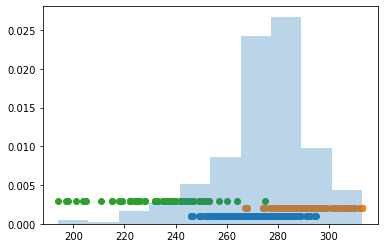

In [42]:
plt.hist(data, density=True, alpha=0.3)
for h in range(3):
    currd = data[best_clus == h]
    plt.scatter(currd, np.zeros_like(currd) + 0.001 * (h+1))

In [43]:
def unique_vals_given_clus(unique_vals_chain, clus_alloc_chain, best_clus):
    c_allocs = np.stack(clus_alloc_chain)
    uniq_vals = np.stack(unique_vals_chain)
    means = uniq_vals[:, :, 0]
    variances = uniq_vals[:, :, 1]
    out = []
    
    for h in range(len(np.unique(best_clus))):
        data_idx = np.where(best_clus == h)[0]
        uniq_vals_idx = c_allocs[:, data_idx] # -> Matrix [n_iter x n_data_in_clus]
        means_by_iter = np.empty((c_allocs.shape[0], len(data_idx)))
        vars_by_iter = np.empty_like(means_by_iter)
        for i in range(c_allocs.shape[0]):
            means_by_iter[i, :] = means[i,uniq_vals_idx[i,:]]
            vars_by_iter[i, :] = variances[i,uniq_vals_idx[i,:]]

        avg_mean_by_iter = np.mean(means_by_iter , axis = 1)
        avg_var_by_iter = np.mean(vars_by_iter , axis = 1)
        
        muhat = np.mean(avg_mean_by_iter)
        sigsqhat = np.mean(avg_var_by_iter)
        out.append(np.array([muhat, sigsqhat]))
        
    return out

In [44]:
clus_vals = unique_vals_given_clus(uniq_vals_out, allocs_out, best_clus)
clus_vals

[array([277.5112379 ,  86.40131196]),
 array([288.29537325,  86.36030694]),
 array([242.82142887,  89.57829282])]

In [45]:
weights = np.sum(best_clus == np.arange(3)[:, np.newaxis], axis=1) / len(data)

In [47]:
weights

array([0.595, 0.297, 0.108])

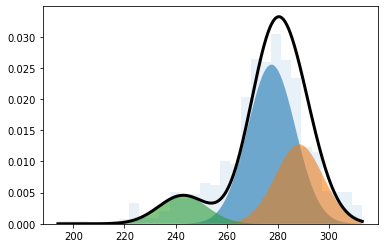

In [46]:
plt.hist(data, density=True, alpha=0.1, bins=30)
xx = np.linspace(np.min(data), np.max(data), 1000)
out_dens = np.zeros_like(xx)
for i in range(3):
    comp_dens = tfd.Normal(clus_vals[i][0], np.sqrt(clus_vals[i][1])).prob(xx)
    out_dens += weights[i] * comp_dens
    plt.fill_between(xx, np.zeros_like(xx), weights[i] * comp_dens, alpha=0.6)

plt.plot(xx, out_dens, c="black", linewidth=3)
plt.show()

## Comment on the inference obtained

The three clusters differ in mean (especially the green one, which has lower mean) and in numerosity (the blue one has a much higher cardinality)

Their weights are (0.595, 0.297, 0.108): the blue cluster has a high weight because is the cluster with distribution most similar to the true one and it represents the most common behaviour that is expected during gestation, that is a birth around the 9th month.
The green cluster is the one with the lowest weight since it represents the uncommon case of premature birth, whereas the orange one is strongly mixed with the blue one and it represents all the birth that happens after the due date.

Hence we can conclude that the population can be divided in 3 groups: the majority of the people has a gestation around the 277 days, there is a group of people that has a little longer gestation, while the last group id composed of people with premature birth. 
Moreover we can say that there are very few person who has gestation longer than 300 days. 

# Exercise 3: Latent Dirichlet Allocation

We now move to one of the most fundamental papers in Machine Learning / Text Mining: Latent Dirichlet Allocations by Blei et al (2003).

The goal is topic modelling given a corpus (= collection of documents)

Denote with $\mathbf y_i = \{y_{i1}, \ldots, y_{i N_i}\}$ the $i$--th document where each $y_{ij}$ denotes a word in a vocabulary, i.e. it is a categorical variable. Let $|V|$ be the size of the vocabulary (number of unique words) so that $y_{ij} \in \{1, 2, \ldots, |V|\}$, and $K$ the number of topics.

For each topic $k$, we assume a different distribution over the vocabulary $\beta_k = (\beta_{k,1}, \ldots \beta_{k, |V|})$, where the vector $\beta_k$ in the $|V|$-dimensional simplex encodes the probability of occurence of each word in topic $k$ (i.e., informally, $\beta_{k, j} = P(\text{"we use word j when talking about topic k"})$  

Moreover, in each document more than one topic can be discussed. Denote with $w_i = (w_{i, 1}, \ldots, w_{i, K})$ the weight of each topic in the $i$--th document.

Then LDA assumes

\begin{equation}
\begin{aligned}
    P(y_{i, j} = v \mid \{\beta_k\}_{k=1}^J, w_i) &= \sum_{k=1}^K w_{i, k} \beta_{k, v}, \quad v=1, \ldots, |V| \\
    \beta_k &\sim \text{Dirichlet}(\alpha_1, \ldots, \alpha_{|V|}) \\
    w_i & \sim \text{Dirichlet}(0.5, \ldots, 0.5)
\end{aligned}
\label{eq:LDA} \tag{3}
\end{equation}


3.1) Rewrite the likelihood introducing suitable auxiliary variables $t_{ij}$ so that $w_i$ does appear on the right hand side of the first equation in \eqref{eq:LDA}

3.2) Specify the hyperparameters of the prior for the $\beta_j$'s such that, a priori, the expected value of $\beta_{j, v}$ is proportional to the number of times word $v$ appears in the corpus. What about the variance?

3.3) Implement a Gibbs sampler to perform posterior inference. Instead of identifying the mixture parameters, consider only the last iteration of the MCMC. What can we say about the topics? 

### SOLUTIONS

3.1) We introduce $t_{ij} \sim \text{Categorical}$ (one for each $y_{ij}$) so that
\begin{equation*}
\begin{aligned}
    P(y_{ij} = v \mid \{\beta_k\}, t_{ij} = h) &= \beta_{h, v} \\
    P(t_{ij} = h \mid w_i) &= \text{w_i_h}
\end{aligned}
\end{equation*}


3.2) We fix the expected value using the expected value of a Dirichlet. Every alpha_i is the number of times word i appears in the corpus over the total occurences of all words. 

To control the variance, call $d_v =  \sum_{i=1}^D \sum_{j=1}^{N_i} \mathbb{I}[y_{ij} = v]$, so that $\alpha_v = \kappa d_v$.

3.3) The joint model is
\begin{equation*}
\begin{aligned}
    \mathcal{L}(\{y_{ij}\}, \{\beta_k\}, \{w_i\}, \{t_{ij}\}) &= \prod_{i=1}^D \prod_{j=1}^{N_i} w_{i, t_{ij}} \prod_{v=1}^{|V|} \beta_{t_{ij}, v}^{\mathbb{I}[y_{ij} = v]} \\
    & \times \prod_{k=1}^K \frac{1}{B(\mathbf \alpha)} \prod_{v=1}^{|V|} \beta_{k, v}^{\alpha_v - 1} \mathbb{I}[\beta_k \in S^{|V|}] \\
    & \times \prod_{i=1}^D \frac{1}{B(\mathbf{0.5})} \prod_{k=1}^{K} w_{i, k}^{0.5 - 1} \mathbb{I}[w_i \in S^{K}]
\end{aligned}
\end{equation*}

Then it is easy to see that

1)
$$
    \mathcal{L}(w_i \mid \cdots) \propto \prod_{k=1}^{K} \text{}
$$

Hint: rewrite 

$$
    \prod_{j=1}^{N_i} w_{i, t_{ij}} = \prod_{k=1}^K w_{i, k}^{n_{i, k}}
$$
where $n_{i, k} = \mathbb{I}[ t_{ij} = k]$.

Finally, conclude that $w_i \mid \cdots \sim \text{Dirichlet (0.5 + sum(Indicator(t_i_j = k)))}$


2) $$ \mathcal{L}(\beta_k \mid \cdots) \propto \text{TODO}
   $$
   
   Hence $\beta_k \mid \cdots \sim \text{Dirichlet (alpha + sum(Indicator(y_i_j = v ,t_i_j = k)))}$
   
   



3) If $y_{ij} = v^*$, 
$$
    P(t_{ij} = k \mid \cdots) \propto w_{ik} \beta_{k, v^*}, \quad k=1, \ldots, K
$$

Hence, $t_{ij}$ is categorically-distributed with probabilities proportional to $w_{ik} \beta_{k, v^*}$. We can sample $t_{ij}$ from a Categorical distribution after having computed the unnormalized probabilities for each $k$ and having normalized them.

In [48]:
# !pip3 install scikit-learn

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer

In [49]:
data = fetch_20newsgroups()["data"]

In [ ]:
data

In [ ]:
## Some preprocessing.
import re

def preprocess_text(text):
    "Removes digits and weird punctuation"
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\__', '', text)
    text = re.sub(r'\___', '', text)
    return text

vectorizer = CountVectorizer(
    preprocessor=preprocess_text,
    stop_words="english",
    strip_accents="unicode",
    max_df=0.95,
    min_df=0.01,
    max_features=500)

vectorizer.fit(data)
vectorizer.get_feature_names()[:50]

In [ ]:
analyzer = vectorizer.build_analyzer()
docs = []
for doc in data:
    tokens = analyzer(doc)
    idxs = np.array(list(filter(
        lambda x: x, 
        [vectorizer.vocabulary_.get(tok, None) for tok in tokens])))
    docs.append(idxs)    

## Docs is your final dataset, work only with it!

docs is a list where every entry represents a document. A document is represented as a list of indexes (each work represents a word)

In [ ]:
n_topics = 20
voc_len = len(vectorizer.get_feature_names())

corpus = {}
for doc in docs:
    for word in doc: 
        if word not in corpus:
            corpus[word] = 1
        else:
            corpus[word] += 1
max_w = np.max(list(corpus.keys()))
prior = []
tot_occurences = sum(corpus.values())
for i in range(1,max_w):
    prior.append(corpus[i]/tot_occurences)
    
alpha = prior


In [ ]:
def lda_gibbs_sampler(docs):
    """
    Parameters
    ----------
    docs: a list of np.arrays of integers, each represnts the 
        words in a document
        
    word_topics are the t_{ij}'s
    voc_weights are the \beta_k's
    doc_weights are the w_i's
    """
    
    word_topics = [
        tfd.Categorical(probs=np.ones(n_topics)).sample(len(x)) for x in docs]
    voc_weights = tfd.Dirichlet(alpha).sample(n_topics)
    doc_weights = tfd.Dirichlet(np.ones(n_topics) * 0.5).sample(len(docs))
    
    for i in range(300):
        print("\r{0} / {1}".format(i+1, 300), flush=True, end=" ")
        word_topics, doc_weights, voc_weights = run_one_lda(
            docs, word_topics, doc_weights, voc_weights)
    return word_topics, doc_weights, voc_weights


def run_one_lda(docs, word_topics, doc_weights, voc_weights):    
    word_topics = update_word_topics(doc_weights, voc_weights, docs)
    doc_weights = update_doc_weights(word_topics)
    voc_weights = update_voc_weights(docs, word_topics)
    return word_topics, doc_weights, voc_weights


def update_voc_weights(docs, word_topics):
    """Updates \beta_k for every k"""
    out = np.zeros((n_topics, voc_len))
    for k in range(n_topics):
        # Get all the words whose topic is k (i.e. t_ij = k)
        # Kept words is a np.array of integers with the indexes/words
        # of all y_{ij} for which t_{ij} = k
        mask = [np.where(x == k) for x in word_topics]
        kept_words = np.concatenate([x[y] for x, y in zip(docs, mask)])
        
        # Returns the unique values in kept_words and their counts
        # For instance if kept_words = [1, 1, 1, 0, 5, 4]
        # --> idxs = [0, 1, 4, 5]
        # --> counts = [1, 3, 1, 1]
        idxs, counts = np.unique(kept_words, return_counts=True)
        
        dir_param = ???
        out[k] = tfd.DISTRIBUTION(dir_param).sample()
    return out


def update_doc_weights(word_topics):
    """Updates w_i for every i"""
    out = np.zeros((len(docs), n_topics))
    for doc_ind, word_topic_in_doc in enumerate(word_topics):
        # word_topic_in_doc is the doc_ind-th row of word_topics
        
        # cnt returns how many times each topic appears in each document
        # i.e. cnt[k] is the number of words ind the doc_ind-th document
        # that have topic k
        cnt = np.sum(
            word_topic_in_doc == np.arange(n_topics)[:, np.newaxis], axis=1)
        
        dir_param = ???
        out[doc_ind] = tfd.DISTRIBUTION(dir_param).sample()
    return out


def update_word_topics(doc_weights, voc_weights, docs):
    out = []
    for i, doc in enumerate(docs):
        # computes an [num_words x K] matrix with entries
        # probas[l, m] beta_{m, v_l} * w_{i, m}
        # where v_l is the word in position 'l'
        # --> for each word (by row) represents the unnormalized probability
        #     of each topic
        probas = doc_weights[i][np.newaxis, :] * voc_weights[:, doc].T
        
        # normalize it approriately
        probas = ???
        out.append(tfd.Categorical(probs=probas).sample())
        
    return out

In [ ]:
word_topics, doc_weights, voc_weights = lda_gibbs_sampler(docs[:5000])

In [ ]:
for k in range(n_topics):
    top_ind = np.argpartition(voc_weights[k, :], -10)[-10:]
    print("Topic: {0}".format(k))
    print(", ".join([vectorizer.get_feature_names()[ind] for ind in top_ind]))
    print("\n\n")